In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os, time, shutil
from tqdm import tqdm
import seaborn as sns
import datetime
import pickle
import scipy.stats as st
import tensorflow as tf
import pandas as pd
import random
from collections import deque
import random

path = '/Users/louisserrano/Documents/Oxford/Courses/Trinity/Dissertation/Code/Toy Experiments/'
os.chdir(path)

from Scripts.rl_glue_horde import RLGlueHorde
from Scripts.toy_env_horde import ToyEnvironment
from Scripts.separateHorde.separateHorde import SeparateHorde
from Scripts.utils import bernouilli_cumulant, gaussian_cumulant, wall_detector_cumulant, gvd_based_cumulant, ReplayBuffer
from Scripts.utils import plot_q_values, plot_theta

path = '/Users/louisserrano/Documents/Oxford/Courses/Trinity/Dissertation/Code/Toy Experiments/Notebooks/GVD'
os.chdir(path)

In [26]:
list_ = os.listdir("results/evaluation/gaussian/policy_5/")

In [27]:
df = pd.read_csv("results/monte_carlo/gaussian_policy5_returns_on_policy_ep_1000")

In [28]:
def get_returns(dataframe, last_state, last_action):
    mask = (dataframe["last_state"] == last_state)&(dataframe["last_action"] == last_action)
    return np.array(dataframe.loc[mask, "return"])

In [29]:
def get_wasserstein(df, theta, track_list):
    for j in range(len(track_list)):
        last_s, last_a = track_list[j]
        mc_returns = get_returns(df, last_s, last_a)
        w = st.wasserstein_distance(mc_returns, theta[last_s, last_a])
        print("last_state: {}, last_action: {}, wasserstein: {}".format(last_s, last_a, w))

In [30]:
track_list = [[23,1], [33,0], [43,0], [51,1], [50,1]]

In [35]:
sorted(list_)

['20200828-085640',
 '20200828-093023',
 '20200828-102012',
 '20200828-102432',
 '20200828-111035',
 '20200828-113408',
 '20200831-131809',
 '20200831-151904',
 '20200831-174843',
 '20200831-181719',
 '20200831-192613',
 '20200901-003219',
 '20200901-030745',
 '20200901-144208',
 '20200901-144216']

In [38]:
path_ = "results/evaluation/gaussian/policy_5/"
for date in sorted(list_):
    path = os.path.join(path_, date, "theta.npy") 
    theta = np.load(path)
    print(date)
    get_wasserstein(df, theta, track_list)

20200828-085640
last_state: 23, last_action: 1, wasserstein: 0.2765929354042019
last_state: 33, last_action: 0, wasserstein: 1.9477193445403813
last_state: 43, last_action: 0, wasserstein: 1.9401112385263128
last_state: 51, last_action: 1, wasserstein: 1.2112272095344823
last_state: 50, last_action: 1, wasserstein: 0.9176890975187417
20200828-093023
last_state: 23, last_action: 1, wasserstein: 0.4319490785600455
last_state: 33, last_action: 0, wasserstein: 1.8942524416177966
last_state: 43, last_action: 0, wasserstein: 1.6590171517413603
last_state: 51, last_action: 1, wasserstein: 1.2476818911658345
last_state: 50, last_action: 1, wasserstein: 0.936938585854527
20200828-102012
last_state: 23, last_action: 1, wasserstein: 0.28617222081706084
last_state: 33, last_action: 0, wasserstein: 1.8296214280859073
last_state: 43, last_action: 0, wasserstein: 1.7266760693550474
last_state: 51, last_action: 1, wasserstein: 1.3085294726485572
last_state: 50, last_action: 1, wasserstein: 0.993572744

In [40]:
date = '20200901-144208'
path = os.path.join(path_, date, "theta.npy") 
theta = np.load(path)

In [44]:
def plot_theta_ref(theta, df, s, a, filename = None):
    t = theta[s, a]
    r = get_returns(df, s, a)
    n = t.shape[0]
    tau = (2 * np.arange(n) + 1) / (2.0 * n)
    cdf = np.quantile(r, tau)

    plt.figure(figsize = (8,6))
    plt.plot(t, tau, marker = 'o', linestyle = "--")
    plt.plot(cdf, tau)
    plt.title("state : {}, action : {}".format(s,a))
    plt.ylabel("quantile levels " r'$\tau$')
    plt.xlabel("$F^{-1}$("r'$\tau$'")")
    if filename is not None:
        plt.savefig(filename)

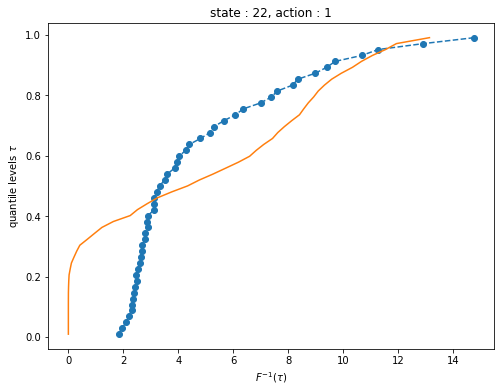

In [51]:
plot_theta_ref(theta, df, 22, 1)

In [44]:
start = time.time()
tt.append(get_returns(df, 23, 1))
end = time.time()
print( end - start)

0.008260965347290039


In [42]:
tt[0]
start = time.time()
tt[0]
end = time.time()
print( end - start)

6.890296936035156e-05


In [60]:
path_ = "results/evaluation/gaussian/policy_6/"
date = '20200901-111529'
path = os.path.join(path_, date, "theta.npy") 
theta = np.load(path)
df = pd.read_csv("results/monte_carlo/gaussian_policy6_returns_on_policy_ep_1000")

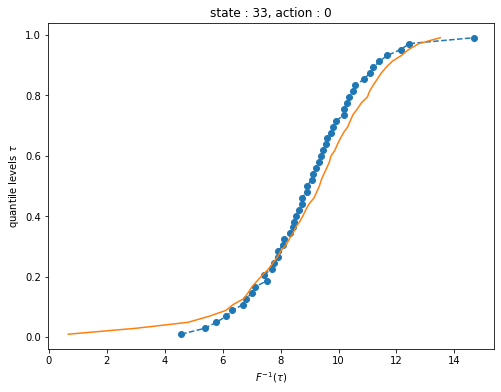

In [62]:
plot_theta_ref(theta, df, 33, 0)

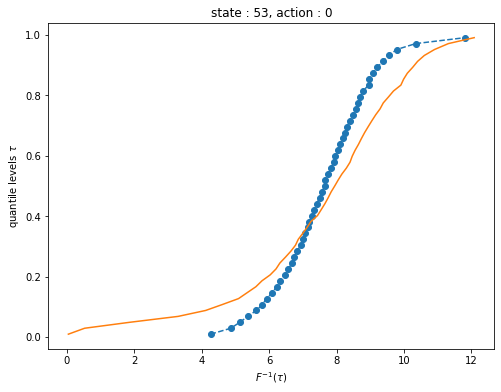

In [67]:
plot_theta_ref(theta, df, 53, 0)

In [70]:
path_ = "results/evaluation/gaussian/policy_4/"
date = '20200901-160157'
path = os.path.join(path_, date, "theta.npy") 
theta = np.load(path)
df = pd.read_csv("results/monte_carlo/gaussian_policy4_returns_on_policy_ep_1000")

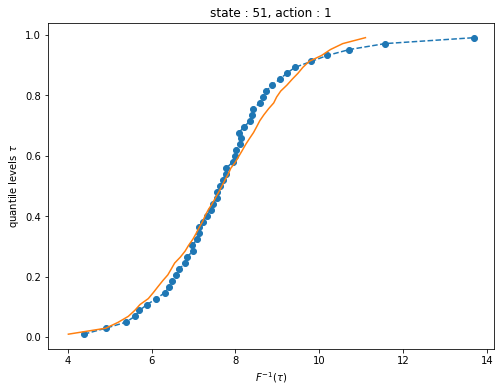

In [74]:
plot_theta_ref(theta, df, 51, 1)

In [79]:
np.tile(z, 51).shape

(32, 255)

In [98]:
t = theta[32]

In [93]:
tt = np.tile(z, 51)

In [94]:
theta[32] - tt

ValueError: operands could not be broadcast together with shapes (4,51) (2601,) 

In [102]:
np.tile(t[:,-1], 51).shape

(204,)

In [105]:
t - np.tile(np.reshape(t[:,-1], (-1,1)), 51)

array([[-9.371041 , -8.856297 , -8.565218 , -8.27357  , -8.022372 ,
        -7.9162183, -7.7779083, -7.5941195, -7.517943 , -7.409661 ,
        -7.291177 , -7.1772094, -7.0803623, -7.043883 , -6.9925275,
        -6.912029 , -6.8818593, -6.755385 , -6.698119 , -6.6381145,
        -6.52782  , -6.4845324, -6.446806 , -6.262498 , -6.2204113,
        -6.1959424, -6.110373 , -6.040608 , -5.9418535, -5.88898  ,
        -5.808948 , -5.7368345, -5.6008544, -5.546366 , -5.431041 ,
        -5.331299 , -5.192506 , -4.9821463, -4.953626 , -4.723239 ,
        -4.704652 , -4.5255604, -4.3320866, -4.173087 , -3.9870844,
        -3.736926 , -3.462326 , -3.1167326, -2.6699219, -1.8422089,
         0.       ],
       [-9.216419 , -8.548064 , -8.058203 , -7.9039173, -7.5832987,
        -7.3371954, -7.2745605, -7.1754026, -6.9780045, -6.8794036,
        -6.7151947, -6.6191044, -6.55455  , -6.402154 , -6.374467 ,
        -6.299795 , -6.258876 , -6.2505198, -6.0458984, -6.0882845,
        -5.967268 , -5.9256

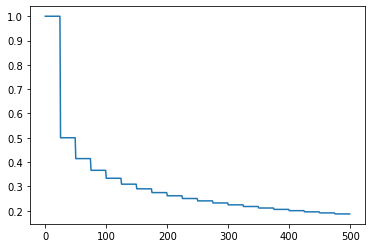

In [42]:
x = np.arange(500)//25
plt.plot(1/(1+np.sqrt(x)))

In [4]:
import numpy as np

In [9]:
import tensorflow as tf

In [18]:
v = np.random.normal(size = 60).reshape(1, -1)

In [43]:
1/(1+np.sqrt(x[-1]))

0.18660549686337075